# 2 AutoGen - Simple agent

AutoGen is a framework that enables the development of LLM applications using multiple agents that can converse with each other to solve tasks. AutoGen agents are customizable, conversable, and seamlessly allow human participation. They can operate in various modes that employ combinations of LLMs, human inputs, and tools.

17/06/2024

<img src="https://raw.githubusercontent.com/retkowsky/images/master/autogenlogo.jpg">

> Documentation: https://microsoft.github.io/autogen/

In [1]:
import autogen
import openai
import os
import sys

from autogen import AssistantAgent, UserProxyAgent
from PIL import Image

In [2]:
sys.version

'3.10.11 (main, May 16 2023, 00:28:57) [GCC 11.2.0]'

In [3]:
config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
)


In [4]:
WORK_DIR = "workdir"

os.makedirs(WORK_DIR, exist_ok=True)

## 1. Agent

In [5]:
assistant = AssistantAgent(
    name="assistant",
    llm_config={
        "cache_seed": None,  # seed for caching and reproducibility
        "config_list": config_list,  # a list of OpenAI API configurations
        "temperature": 0.,
    },
)

In [6]:
def is_termination_msg(data):
    has_content = "content" in data and data["content"] is not None
    return has_content and "TERMINATE" in data["content"]

In [7]:
user_proxy = UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=is_termination_msg,
    code_execution_config={"work_dir": WORK_DIR},
)

In [8]:
assistant

In [9]:
user_proxy

## 2. Examples

In [10]:
user_proxy.initiate_chat(
    assistant,
    message=
    "What is the current year? Compare the year-to-date gain for MICROSOFT and SALESFORCE",
)

user_proxy (to assistant):

What is the current year? Compare the year-to-date gain for MICROSOFT and SALESFORCE

--------------------------------------------------------------------------------
assistant (to user_proxy):

To get the current year, we can use Python's datetime module. Here is the Python code to get the current year:

```python
import datetime

current_year = datetime.datetime.now().year
print("The current year is:", current_year)
```

To compare the year-to-date (YTD) gain for MICROSOFT and SALESFORCE, we need to fetch the stock prices. We can use the `yfinance` library in Python to fetch the stock prices. 

Please note that you need to install the `yfinance` library if it's not installed. You can install it using pip:

```sh
pip install yfinance
```

After installing `yfinance`, you can use the following Python code to fetch the YTD gain for MICROSOFT (MSFT) and SALESFORCE (CRM):

```python
import yfinance as yf
from datetime import datetime

# Get the current date
now


--------------------------------------------------------------------------------
assistant (to user_proxy):

The current year is 2024.

The Year-to-Date (YTD) gain for MICROSOFT (MSFT) is approximately 20.35%. This means that the value of MICROSOFT stock has increased by this percentage since the start of the year.

On the other hand, the YTD gain for SALESFORCE (CRM) is approximately -9.50%. This means that the value of SALESFORCE stock has decreased by this percentage since the start of the year.

Therefore, MICROSOFT has performed better than SALESFORCE in terms of stock price growth since the start of the year 2024.

TERMINATE

--------------------------------------------------------------------------------


ChatResult(chat_id=None, chat_history=[{'content': 'What is the current year? Compare the year-to-date gain for MICROSOFT and SALESFORCE', 'role': 'assistant'}, {'content': 'To get the current year, we can use Python\'s datetime module. Here is the Python code to get the current year:\n\n```python\nimport datetime\n\ncurrent_year = datetime.datetime.now().year\nprint("The current year is:", current_year)\n```\n\nTo compare the year-to-date (YTD) gain for MICROSOFT and SALESFORCE, we need to fetch the stock prices. We can use the `yfinance` library in Python to fetch the stock prices. \n\nPlease note that you need to install the `yfinance` library if it\'s not installed. You can install it using pip:\n\n```sh\npip install yfinance\n```\n\nAfter installing `yfinance`, you can use the following Python code to fetch the YTD gain for MICROSOFT (MSFT) and SALESFORCE (CRM):\n\n```python\nimport yfinance as yf\nfrom datetime import datetime\n\n# Get the current date\nnow = datetime.now()\n\n# 

### Another example

In [11]:
user_proxy.send(
    recipient=assistant,
    message=
    "Plot a chart of their price change YTD and save the plot into msft_salesforce.png.\
Choose the green color for Microsoft and blue for SalesForce.",
)

user_proxy (to assistant):

Plot a chart of their price change YTD and save the plot into msft_salesforce.png.Choose the green color for Microsoft and blue for SalesForce.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To plot a chart of the price change YTD for MICROSOFT and SALESFORCE and save the plot into a file, we can use the matplotlib library in Python. Here is the Python code to do this:

```python
import matplotlib.pyplot as plt

# Plot the closing prices of MICROSOFT and SALESFORCE
plt.figure(figsize=(14,7))
plt.plot(msft['Close'], color='g', label='MICROSOFT')
plt.plot(crm['Close'], color='b', label='SALESFORCE')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('MICROSOFT vs SALESFORCE YTD Closing Prices')
plt.legend()

# Save the plot into a file
plt.savefig('msft_salesforce.png')
```

This code first plots the closing prices of MICROSOFT and SALESFORCE. It then adds labels and a


--------------------------------------------------------------------------------


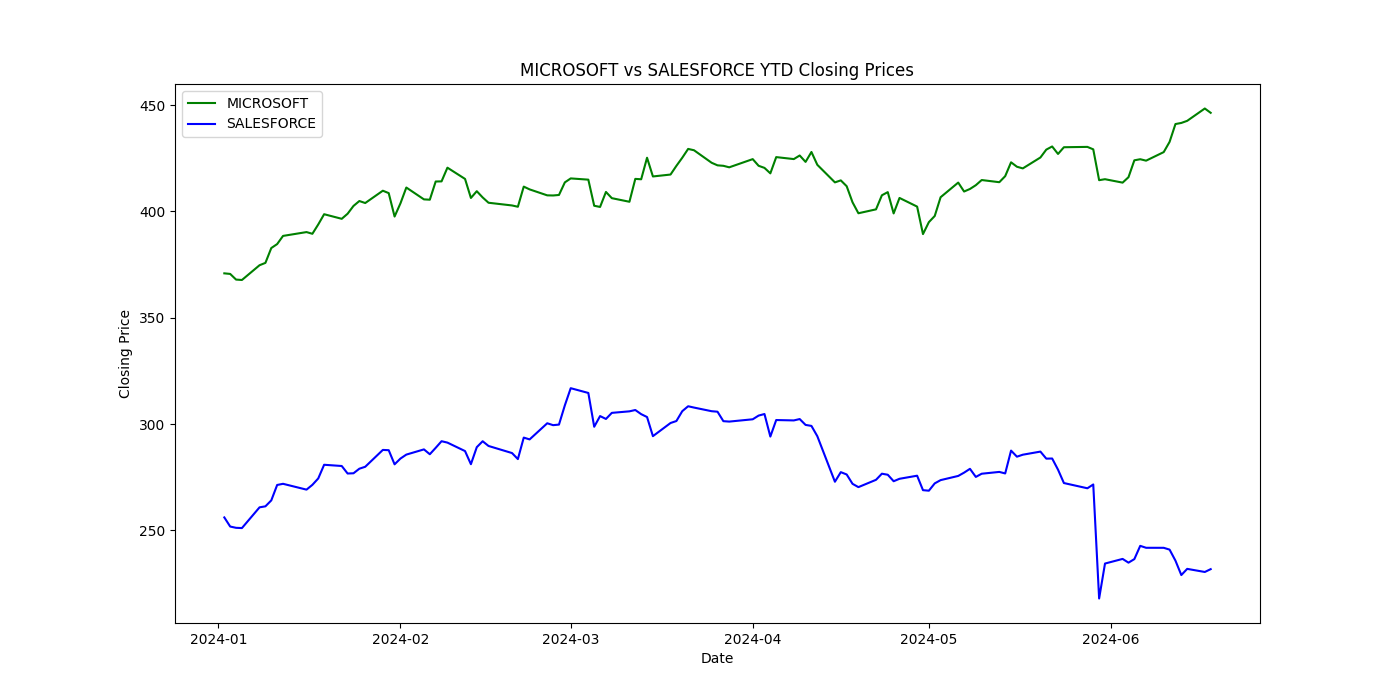

In [12]:
img = Image.open(os.path.join(WORK_DIR, 'msft_salesforce.png'))
img

In [13]:
!ls $WORK_DIR/*.* -lh

-rwxrwxrwx 1 root root 62K Jun 19 08:08 workdir/msft_salesforce.png
-rwxrwxrwx 1 root root 52K Jun 19 08:04 workdir/msft_salesforce_ma.png


### Another example

In [14]:
user_proxy.send(
    recipient=assistant,
    message=
    "Add a 10 days moving average plot for these two time series and save it to msft_salesforce_ma.png. \
The moving average line for Microsoft should be in lime and the one for Salesforce should be in cyan color.",
)

user_proxy (to assistant):

Add a 10 days moving average plot for these two time series and save it to msft_salesforce_ma.png. The moving average line for Microsoft should be in lime and the one for Salesforce should be in cyan color.

--------------------------------------------------------------------------------
assistant (to user_proxy):

To add a 10 days moving average plot for MICROSOFT and SALESFORCE, we can use the `rolling` function in pandas to calculate the moving average, and then plot it using matplotlib. Here is the Python code to do this:

```python
# Calculate the 10 days moving average
msft_ma = msft['Close'].rolling(window=10).mean()
crm_ma = crm['Close'].rolling(window=10).mean()

# Plot the closing prices and moving averages of MICROSOFT and SALESFORCE
plt.figure(figsize=(14,7))
plt.plot(msft['Close'], color='g', label='MICROSOFT')
plt.plot(crm['Close'], color='b', label='SALESFORCE')
plt.plot(msft_ma, color='lime', label='MICROSOFT MA')
plt.plot(crm_ma, color='cyan

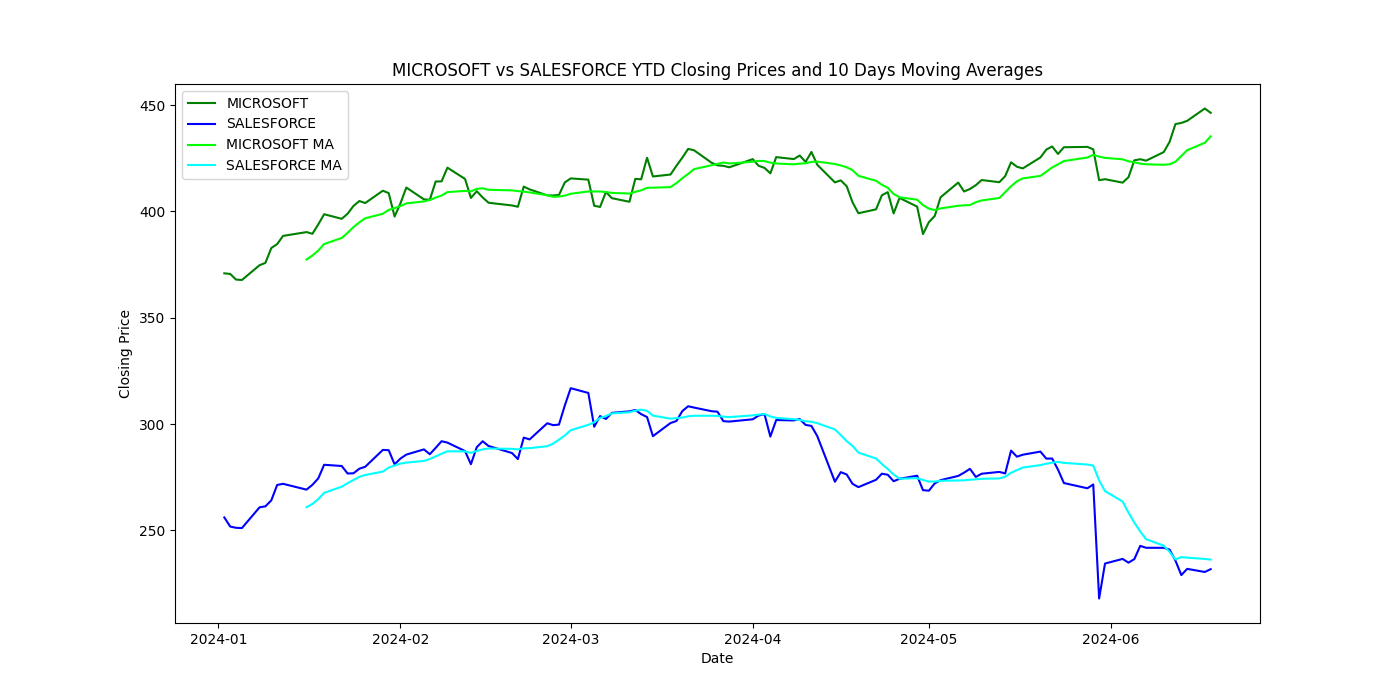

In [15]:
img = Image.open(os.path.join(WORK_DIR, 'msft_salesforce_ma.png'))
img

In [16]:
!ls $WORK_DIR/*.* -lh

-rwxrwxrwx 1 root root 62K Jun 19 08:08 workdir/msft_salesforce.png
-rwxrwxrwx 1 root root 83K Jun 19 08:09 workdir/msft_salesforce_ma.png
